## German Credit Data 
### Project workflow: 

Step 1: 
Framing the Problem

-> Objective: To predict the loan applicant as a 'good' or 'bad'. A binary classifier

Step 2:
Get the data

Step 3: 
Discover and visualise the data to gain insights

Step 4:
Prepare the data for ML algorithms (Pre-processing for model input)

Step 5:
Build the model and Train

Step 6:
Testing and Vaidation

Step 7:
Fine tune the model 

Step 8:
Present the solution 


### Step 2: Load the dataset from the given url

In [ ]:
!wget --no-check-certificate \
  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

--2020-09-19 12:11:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
Resolving archive.ics.uci.edu... 128.195.10.252
Connecting to archive.ics.uci.edu|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79793 (78K) [application/x-httpd-php]
Saving to: 'german.data.1'

german.data.1       100%[===================>]  77.92K   179KB/s    in 0.4s    

2020-09-19 12:11:27 (179 KB/s) - 'german.data.1' saved [79793/79793]



### Step 3: Visualise the data 
To gain the insights of the data, distribution/ histograms are plotted from continuous data while standard correlation coefficients (Pearson's r) are computed using corr() method to evaluate the correlation of all the attributes in the datasets to the creditability of the loan applicants. 

**NOTE: UNCOMMENT LINE 17 to LINE 29 for this step. For Step 4, LINE 17 to LINE 29 has to be COMMENTED BACK for categorical feature column.

In [ ]:
import pandas as pd
import numpy as np
from jupyterthemes import jtplot
jtplot.style(ticks=True, grid=False)

names = ['AccountBalance', 'DurationCredit', 'PaymentStatusOfPreviousCredit', 
         'Purpose', 'CreditAmount', 'ValueSavings', 
         'LengthOfCurrentEmployment', 'Instalmentpercent', 'SexMaritalStatus', 
         'Guarantors', 'DurationInCurrentAddress', 'Property', 
         'Age', 'OtherInstallment', 'Housing', 'NumberCreditsAtThisBank', 
         'Job', 'NumberOfDependents', 'Telephone', 'ForeignWorker', 'Creditability']

df = pd.read_csv('german.data', names = names, delimiter = ' ')
print(df.shape)
print(df.columns)
# df.AccountBalance.replace(['A11','A12','A13','A14'], [1,2,3,4], inplace = True)
# df.PaymentStatusOfPreviousCredit.replace(['A30','A31', 'A32', 'A33', 'A34'], [0,1,2,3,4], inplace = True)
# df.Purpose.replace(['A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47',
#                    'A48', 'A49', 'A410'], [0,1,2,3,4,5,6,7,8,9,10], inplace = True)
# df.ValueSavings.replace (['A61','A62','A63','A64','A65'], [1,2,3,4,5], inplace = True)
# df.LengthOfCurrentEmployment.replace (['A71','A72','A73','A74','A75'], [1,2,3,4,5], inplace = True)
# df.SexMaritalStatus.replace (['A91','A92','A93','A94','A95'], [1,2,3,4,5], inplace = True)
# df.Guarantors.replace (['A101','A102','A103'], [1,2,3], inplace = True)
# df.Property.replace (['A121','A122','A123','A124'], [1,2,3,4], inplace = True)
# df.OtherInstallment.replace (['A141','A142','A143'], [1,2,3], inplace = True)
# df.Housing.replace (['A151','A152','A153'], [1,2,3], inplace = True)
# df.Job.replace (['A171','A172','A173','A174'], [1,2,3,4], inplace = True)
# df.Telephone.replace (['A191', 'A192'], [1,2], inplace = True)
# df.ForeignWorker.replace (['A201','A202'], [1,2], inplace = True)
df.Creditability.replace([1,2], [1,0], inplace = True)
df.head(10)


(1000, 21)
Index(['AccountBalance', 'DurationCredit', 'PaymentStatusOfPreviousCredit',
       'Purpose', 'CreditAmount', 'ValueSavings', 'LengthOfCurrentEmployment',
       'Instalmentpercent', 'SexMaritalStatus', 'Guarantors',
       'DurationInCurrentAddress', 'Property', 'Age', 'OtherInstallment',
       'Housing', 'NumberCreditsAtThisBank', 'Job', 'NumberOfDependents',
       'Telephone', 'ForeignWorker', 'Creditability'],
      dtype='object')


,AccountBalance,DurationCredit,PaymentStatusOfPreviousCredit,Purpose,CreditAmount,ValueSavings,LengthOfCurrentEmployment,Instalmentpercent,SexMaritalStatus,Guarantors,...,Property,Age,OtherInstallment,Housing,NumberCreditsAtThisBank,Job,NumberOfDependents,Telephone,ForeignWorker,Creditability
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,0
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,0
5,4,36,2,6,9055,5,3,2,3,1,...,4,35,3,3,1,2,2,2,1,1
6,4,24,2,2,2835,3,5,3,3,1,...,2,53,3,2,1,3,1,1,1,1
7,2,36,2,1,6948,1,3,2,3,1,...,3,35,3,1,1,4,1,2,1,1
8,4,12,2,3,3059,4,4,2,1,1,...,1,61,3,2,1,2,1,1,1,1
9,2,30,4,0,5234,1,1,4,4,1,...,3,28,3,2,2,4,1,1,1,0


In [ ]:
df.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

The dataset has a total of 1000 loan applicants with 700 good and 300 bad applicants.

In [ ]:
df.info()
corr_matrix = df.corr()
corr_matrix['Creditability'].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   AccountBalance                 1000 non-null   int64
 1   DurationCredit                 1000 non-null   int64
 2   PaymentStatusOfPreviousCredit  1000 non-null   int64
 3   Purpose                        1000 non-null   int64
 4   CreditAmount                   1000 non-null   int64
 5   ValueSavings                   1000 non-null   int64
 6   LengthOfCurrentEmployment      1000 non-null   int64
 7   Instalmentpercent              1000 non-null   int64
 8   SexMaritalStatus               1000 non-null   int64
 9   Guarantors                     1000 non-null   int64
 10  DurationInCurrentAddress       1000 non-null   int64
 11  Property                       1000 non-null   int64
 12  Age                            1000 non-null   int64
 13  OtherInstallment   

Creditability                    1.000000
AccountBalance                   0.350847
PaymentStatusOfPreviousCredit    0.228785
ValueSavings                     0.178943
LengthOfCurrentEmployment        0.116002
OtherInstallment                 0.109844
Age                              0.091127
SexMaritalStatus                 0.088184
ForeignWorker                    0.082079
NumberCreditsAtThisBank          0.045732
Telephone                        0.036466
Guarantors                       0.025137
Housing                          0.019315
NumberOfDependents               0.003015
DurationInCurrentAddress        -0.002967
Purpose                         -0.017979
Job                             -0.032735
Instalmentpercent               -0.072404
Property                        -0.142612
CreditAmount                    -0.154739
DurationCredit                  -0.214927
Name: Creditability, dtype: float64

Standard correlation coefficient ranges from -1 to 1. With value closes to 1 indicates that there is a strong positive correlation. When the coefficient closes to -1, it indicates that there is a strong negative correlation while coefficient closes to 0 means there's no linear correlation. From the analysis above, it can be observed that the attributes such as 'NumberOfDependents', 'DurationInCurrentAddress', 'Housing', and 'Purpose' are weakly correlated to the application's creditability. Thus, the attributes can be considered to be dropped for model training in the later steps. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe02a4a8d00>]],
      dtype=object)

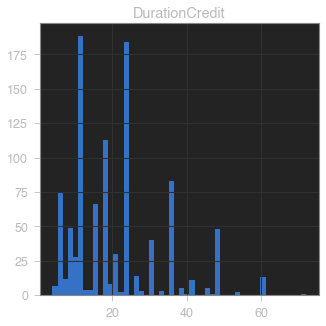

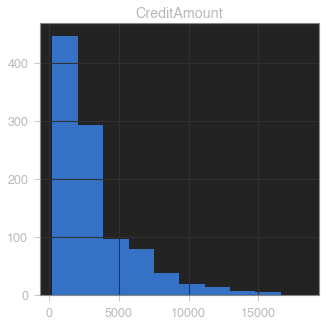

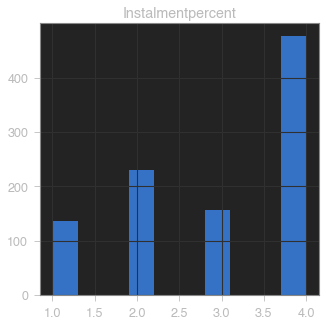

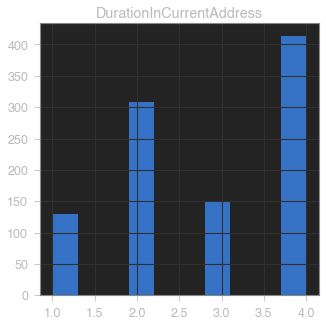

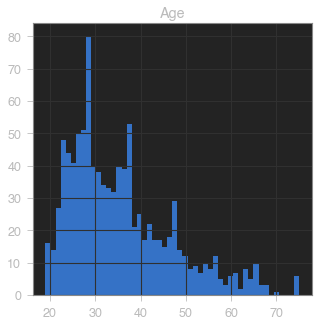

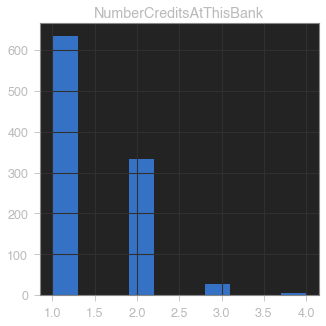

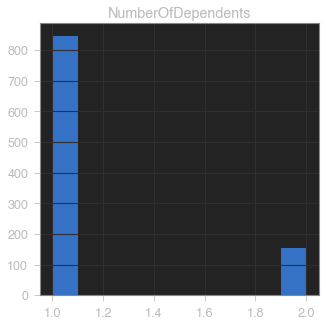

In [ ]:

from jupyterthemes import jtplot
jtplot.style(ticks=True, grid=False)
%matplotlib inline 
import matplotlib.pyplot as plt

# df.hist(bins = 50, figsize= (20,15))
df.hist(['DurationCredit'],bins=50, figsize = (5,5))
df.hist(['CreditAmount'],figsize = (5,5))
df.hist(['Instalmentpercent'],figsize = (5,5))
df.hist(['DurationInCurrentAddress'],figsize = (5,5))
df.hist(['Age'],bins=50, figsize = (5,5))
df.hist(['NumberCreditsAtThisBank'],figsize = (5,5))
df.hist(['NumberOfDependents'],figsize = (5,5))

### Step 4: Prepare data for model input
The data loaded are splitted into 60/20/20 for training, validation and test set. Feature_column in TensorFlow is used here as there are categorical attributes and numerical attributes in the dataset. The output of a feature column becomes the input to the model.
#### Categorical features
Thus, categorical_column is used for the categorical features where the categorical data would be mapped to numeric values. The categorical vocabulary columns provide a way to represent strings as a one-hot vector. 
#### Numerical features
A numeric_column is used to represent the real valued features. When using this column, the model with receive the column value from the dataframe unchanged. 
#### Normalisation for the numerical features.
Since it is preferable for the model's input to be in the range of 0 to 1, the numeric features could be normalised to the range of 0 to 1. For feature columns in TensorFlow, this could be done by using normalizer_fn. Normalizer_fn would be 'None' by default or must be a callable if not None. 
#### Create a feature layer (DenseFeatures layer )
After defining the feature columns for both categorical and numerical features (normalised),a DenseFeatures layer is created to input them into the Keras model. 

In [ ]:
import tensorflow as tf
from tensorflow import feature_column
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.25)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(df, shuffle=True, batch_size=10):
    df = df.copy()
    labels = df.pop('Creditability')
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))
    ds = ds.batch(batch_size)
    return ds

batch_size = 10 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

example_batch = next(iter(train_ds))[0]
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    print(feature_layer(example_batch).numpy())


600 train examples
200 validation examples
200 test examples


In [ ]:
num_features = ['DurationCredit', 'CreditAmount', 'Instalmentpercent', #'DurationInCurrentAddress',
              'Age', 'NumberCreditsAtThisBank'] #,'NumberOfDependents']


def normalize_numeric_data(train, min, max):
     return (train - min)/(max-min)
    
def get_scal(feature):
    def minmax(x):
        mini = train[feature].min()
        maxi = train[feature].max()
        return (x - mini)/(maxi-mini)
    return(minmax)

num_feature_columns = []
for header in num_features:
    scal_input_fn = get_scal(header)
    num_feature_columns.append(feature_column.numeric_column(header, normalizer_fn=scal_input_fn))
    
demo(num_feature_columns)

[[0.5        0.06201167 0.35714287 1.         0.        ]
 [0.4107143  0.06894465 0.         0.33333334 0.33333334]
 [0.8035714  0.0276769  0.03571429 0.33333334 0.        ]
 [0.21428572 0.32243866 0.78571427 0.         0.        ]
 [0.07142857 0.04390888 0.10714286 1.         0.        ]
 [0.39285713 0.33360845 0.35714287 0.6666667  0.        ]
 [0.2857143  0.3853307  0.51785713 0.6666667  0.33333334]
 [0.5535714  0.10955211 0.30357143 1.         0.33333334]
 [0.78571427 0.7431496  1.         0.33333334 0.        ]
 [0.08928572 0.49636844 0.5714286  0.33333334 0.        ]]


In [ ]:

cat_feature_columns = []

indicator_column_names = ['AccountBalance', 'PaymentStatusOfPreviousCredit', 'ValueSavings', #'Purpose',
                          'LengthOfCurrentEmployment', 'SexMaritalStatus', 'Guarantors','Property',
                          'OtherInstallment','Job', 'Telephone', 'ForeignWorker'] #,'Housing']
for col_name in indicator_column_names:
    categorical_column = feature_column.categorical_column_with_vocabulary_list(col_name,
                                                                               df[col_name].unique())
    indicator_column = feature_column.indicator_column(categorical_column)
    cat_feature_columns.append(indicator_column)

#demo(cat_feature_columns)

preprocessing_layer = tf.keras.layers.DenseFeatures(cat_feature_columns + num_feature_columns)
print(preprocessing_layer(example_batch).numpy()[0])


[0.         0.         0.         1.         0.5        0.06201167
 0.35714287 1.         0.         1.         0.         0.
 1.         1.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         1.         0.         0.
 1.         0.         0.         1.         0.         0.
 0.         0.         0.         1.        ]


### Step 5: Build the Model and Train

In [ ]:
from tensorflow import keras
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
        preprocessing_layer,
    #tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(16, activation = 'relu', 
                               kernel_regularizer=regularizers.l2(0.00005)),
        tf.keras.layers.Dropout(0.35),
       # tf.keras.layers.Dense(16, activation = 'relu',
        #                     kernel_regularizer=regularizers.l2(0.000005)),
        #tf.keras.layers.Dropout(0.6),
        tf.keras.layers.Dense(32, activation = 'relu',
                            kernel_regularizer=regularizers.l2(0.00005)),
        tf.keras.layers.Dropout(0.35),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

# kernel_regularizer=regularizers.l2(0.00005)
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')
]

model.compile (optimizer = optimizers.Adam(lr=0.0001),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = [metrics.TruePositives(name='tp'),
    metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall')])


history = model.fit (train_ds, 
                     validation_data = val_ds,
                     epochs = 100)

test = model.evaluate (test_ds)


Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
30/60 [==============>...............] - ETA: 0s - loss: 0.6309 - tp: 31.0000 - fp: 15.0000 - tn: 74.0000 - fn: 180.0000 - accuracy: 0.3500 - precision: 0.6739 - recall: 0.1469       WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'AccountBalance': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=string>, 'DurationCredit': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=int64>, 'PaymentStatusOfPreviousCredit': <tf.Tensor 'ExpandDims_14:0' shape=(None, 1) dtype=string>, 'Purpose': <tf.Tensor 'ExpandDims_16:0' shape=(None, 1) dtype=string>, 'CreditAmount': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=int64>, 'ValueSavings': <tf.Tensor 'ExpandDims_19:0' shape=(None, 1) dtype=string>, 'LengthOfCurrentEmployment': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=string>, 'Instalmentpe

60/60 [==============================] - 0s 2ms/step - loss: 0.6242 - tp: 225.0000 - fp: 70.0000 - tn: 112.0000 - fn: 193.0000 - accuracy: 0.5617 - precision: 0.7627 - recall: 0.5383 - val_loss: 0.6208 - val_tp: 76.0000 - val_fp: 22.0000 - val_tn: 36.0000 - val_fn: 66.0000 - val_accuracy: 0.5600 - val_precision: 0.7755 - val_recall: 0.5352
Epoch 10/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6254 - tp: 232.0000 - fp: 87.0000 - tn: 95.0000 - fn: 186.0000 - accuracy: 0.5450 - precision: 0.7273 - recall: 0.5550 - val_loss: 0.6201 - val_tp: 79.0000 - val_fp: 23.0000 - val_tn: 35.0000 - val_fn: 63.0000 - val_accuracy: 0.5700 - val_precision: 0.7745 - val_recall: 0.5563
Epoch 11/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6252 - tp: 250.0000 - fp: 94.0000 - tn: 88.0000 - fn: 168.0000 - accuracy: 0.5633 - precision: 0.7267 - recall: 0.5981 - val_loss: 0.6193 - val_tp: 89.0000 - val_fp: 26.0000 - val_tn: 32.0000 - val_fn: 53.0000 - val_accuracy: 0.

60/60 [==============================] - 0s 2ms/step - loss: 0.5895 - tp: 361.0000 - fp: 124.0000 - tn: 58.0000 - fn: 57.0000 - accuracy: 0.6983 - precision: 0.7443 - recall: 0.8636 - val_loss: 0.5833 - val_tp: 127.0000 - val_fp: 39.0000 - val_tn: 19.0000 - val_fn: 15.0000 - val_accuracy: 0.7300 - val_precision: 0.7651 - val_recall: 0.8944
Epoch 56/100
60/60 [==============================] - 0s 2ms/step - loss: 0.5881 - tp: 353.0000 - fp: 109.0000 - tn: 73.0000 - fn: 65.0000 - accuracy: 0.7100 - precision: 0.7641 - recall: 0.8445 - val_loss: 0.5828 - val_tp: 127.0000 - val_fp: 39.0000 - val_tn: 19.0000 - val_fn: 15.0000 - val_accuracy: 0.7300 - val_precision: 0.7651 - val_recall: 0.8944
Epoch 57/100
60/60 [==============================] - 0s 2ms/step - loss: 0.5832 - tp: 360.0000 - fp: 109.0000 - tn: 73.0000 - fn: 58.0000 - accuracy: 0.7217 - precision: 0.7676 - recall: 0.8612 - val_loss: 0.5823 - val_tp: 124.0000 - val_fp: 39.0000 - val_tn: 19.0000 - val_fn: 18.0000 - val_accuracy: 

20/20 [==============================] - 0s 1ms/step - loss: 0.5611 - tp: 115.0000 - fp: 24.0000 - tn: 36.0000 - fn: 25.0000 - accuracy: 0.7550 - precision: 0.8273 - recall: 0.8214


### Step 6: Visualising the performance of the model trained & Testing the model

loss : 0.5611477494239807
tp : 115.0
fp : 24.0
tn : 36.0
fn : 25.0
accuracy : 0.7549999952316284
precision : 0.8273381590843201
recall : 0.8214285969734192
f1-score: 0.789515571573436


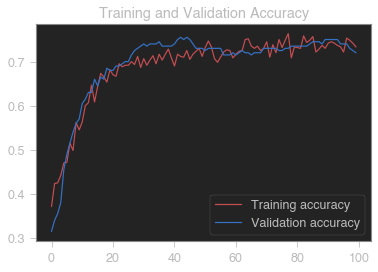

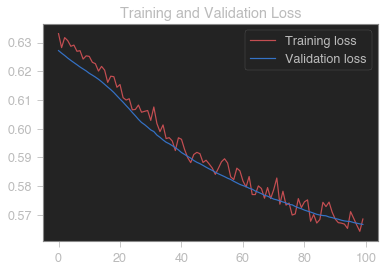

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history ['loss']
val_loss = history.history['val_loss']
prec= history.history['precision']
val_prec = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc= 0)

plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc= 0)
plt.figure()

for name, value in zip(model.metrics_names, test):
    print(name,':',value)
    
f1_score = (2*test[5]*test[6])/(test[5]+test[6])
print('f1-score:',f1_score)


The model trained could achieve a maximum accuracy of 76.33% with validation accuracy of 75.00% at 78 epochs. After training for 100 epochs, the training and validation accuracy are 73.33% and 72.00% respectively. The graphs for accuracy and loss are plotted above to visualise the results of the model trained. It can be observed that the both the curves fit well to each other, thus, no overfitting or underfitting. 
To evaluate the performance of the model, the test set that has been splitted to 20% of the overall dataset is used to test the model trained. It has a test accuracy, precision, recall, and f1-score of 75.5%, 82.7%, 82.1%, 78.95% respectuvely. 

## Model Tuning 
### Neural Network HyperParameters
1. learning rate parameter:

The learning rate used by the optimizer is tuned for [0.01, 0.001, 0.0001,0.00001] and 0.0001 is selected as both training and validation accuracy fits nearer. 

2. The number of hidden layers:

Two hidden layers have been tried to train the model. By adding additional hidden layer, overfitting happens. Thus, only one hidden layer is sufficient. 

3. The number of neurons:

The number of neurons is generally depends on the number of the inputs. Since 16 features (columns) in total are used to train the model, thus, 16 neurons are selected. By increasing the number of neurons to 32 in the hidden layer(twice the number of neurons in input layer), the training accuracy and validation accuracy fit well to each other compared to that of using 16 neurons in the hidden layer. 

4. Batch size:

Small batches are recommended between 2 to 32 (Masters and Luschi, 2018) for training neural network. Thus, the batch sizes are tuned with [5,10,20]. The model overfits at 20 while fits well with batch_size = 10. 

